In [9]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, LeakyReLU
from keras.layers import UpSampling2D, Conv2D
from keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt

g = Sequential()
g.add(Dense(input_dim=100, units=7*7*128, activation=LeakyReLU(0.2)))
g.add(BatchNormalization())
g.add(Reshape((7, 7, 128)))
g.add(UpSampling2D())
g.add(Conv2D(filters=128, 
             kernel_size=3, # kernel_size=(3,3)
             padding='Same'))
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(0.2)))
g.add(UpSampling2D())
g.add(Conv2D(filters=1, 
             kernel_size=3,
             padding='Same',
             activation='tanh'))

d = Sequential()
d.add(Conv2D(filters=64, 
             kernel_size=3,
             padding='Same',
             input_shape=(28, 28, 1),
             strides=2))
d.add(Activation(LeakyReLU(0.2)))
d.add(Dropout(0.3))
d.add(Conv2D(filters=64, 
             kernel_size=3,
             padding='Same',
             strides=2))
d.add(Activation(LeakyReLU(0.2)))
d.add(Dropout(0.3))
d.add(Flatten())
d.add(Dense(units=1, activation='sigmoid'))
d.compile(loss='binary_crossentropy', optimizer='adam')
d.trainable=False

gan_input = Input(shape=(100,))
h = g(gan_input)
gan_output = d(h)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

def gan_train(epoch, batch_size, save_interval):
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_train = (X_train-127.5)/127.5
    true_label = np.ones((batch_size, 1))
    fake_label = np.zeros((batch_size, 1))
    
    for e in range(epoch):
        true_data = X_train[np.random.randint(0, X_train.shape[0], batch_size)]
        d_loss_true = d.train_on_batch(true_data, true_label)
        
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        fake_data = g.predict(noise)
        d_loss_fake = d.train_on_batch(fake_data, fake_label)
        
        d_loss = 0.5 * np.add(d_loss_true, d_loss_fake)
        
        g_loss = gan.train_batch(noise, true_label)
        
        print('Epoch :', e+1, '\tD_LOSS :', round(d_loss, 4),
              '\tG_LOSS :', round(g_loss, 4))
        
        if e % save_interval == 0:
            noise = np.random.normal(0, 1, size=(25, 100))
            imgs = g.predict(noise)
            imgs = 0.5 * imgs + 0.5
            
            fig, ax = plt.subplots(5, 5)
            num_of_imgs = 0
            for i in range(5):
                for j in range(5):
                    axs[i, j].imshow(imgs[num_of_imgs, :, :, 0], cmap='gray')
                    axs[i, j].axis('off')
                    num_of_imgs += 1

In [11]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, LeakyReLU
from keras.layers import UpSampling2D, Conv2D
from keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt

g = Sequential()
g.add(Dense(input_dim=100, units=7*7*128, activation=LeakyReLU(0.2)))
g.add(BatchNormalization())
g.add(Reshape((7, 7, 128)))
g.add(UpSampling2D())
g.add(Conv2D(filters=128, kernel_size=3, padding="Same"))
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(0.2)))
g.add(UpSampling2D())
g.add(Conv2D(filters=1, kernel_size=3, padding="Same", activation="tanh"))

d = Sequential()
d.add(Conv2D(filters=64, kernel_size=3, padding="Same", \
             input_shape=(28, 28, 1), strides=2))
d.add(Activation(LeakyReLU(0.2)))
d.add(Dropout(0.3))
d.add(Conv2D(filters=64, kernel_size=3, padding="Same", strides=2))
d.add(Activation(LeakyReLU(0.2)))
d.add(Dropout(0.3))
d.add(Flatten())
d.add(Dense(units=1, activation="sigmoid"))
d.compile(loss="binary_crossentropy", optimizer="adam")
d.trainable = False

gan_input = Input(shape=(100,))
h = g(gan_input)
gan_output = d(h)
gan = Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer="adam")

def gan_train(epoch, batch_size, save_interval):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
    X_train = (X_train - 127.5) / 127.5
    true_label = np.ones((batch_size, 1))
    fake_label = np.zeros((batch_size, 1))
    
    for e in range(epoch):
        true_data = X_train[np.random.randint(0, X_train.shape[0], batch_size)]
        d_loss_true = d.train_on_batch(true_data, true_label)
        
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        fake_data = g.predict(noise)
        d_loss_fake = d.train_on_batch(fake_data, fake_label)
        
        d_loss = 0.5 * np.add(d_loss_true, d_loss_fake)
        
        g_loss = gan.train_on_batch(noise, true_label)
        
        print("Epoch :", e+1, "\tD_LOSS :", round(d_loss, 4), \
             "\tG_LOSS :", round(g_loss, 4))

        if e % save_interval == 0:
            noise = np.random.normal(0, 1, size=(25, 100))
            imgs = g.predict(noise)
            imgs = 0.5 * imgs + 0.5
            
            fig, axs = plt.subplots(5, 5)
            num_of_imgs = 0
            for i in range(5):
                for j in range(5):
                    axs[i, j].imshow(imgs[num_of_imgs, :, :, 0], cmap="gray")
                    axs[i, j].axis("off")
                    num_of_imgs += 1

C:\anaconda\envs\test3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


C:\anaconda\envs\test3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch : 1 	D_LOSS : 0.7199 	G_LOSS : 0.6167


C:\anaconda\envs\test3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch : 2 	D_LOSS : 0.5999 	G_LOSS : 0.4637
Epoch : 3 	D_LOSS : 0.5372 	G_LOSS : 0.2887
Epoch : 4 	D_LOSS : 0.5086 	G_LOSS : 0.1483
Epoch : 5 	D_LOSS : 0.5153 	G_LOSS : 0.0753
Epoch : 6 	D_LOSS : 0.5343 	G_LOSS : 0.0519
Epoch : 7 	D_LOSS : 0.5515 	G_LOSS : 0.0504
Epoch : 8 	D_LOSS : 0.5556 	G_LOSS : 0.0695
Epoch : 9 	D_LOSS : 0.545 	G_LOSS : 0.1053
Epoch : 10 	D_LOSS : 0.5255 	G_LOSS : 0.1649
Epoch : 11 	D_LOSS : 0.5047 	G_LOSS : 0.2591
Epoch : 12 	D_LOSS : 0.49 	G_LOSS : 0.3615
Epoch : 13 	D_LOSS : 0.4766 	G_LOSS : 0.4581
Epoch : 14 	D_LOSS : 0.4626 	G_LOSS : 0.5843
Epoch : 15 	D_LOSS : 0.4593 	G_LOSS : 0.6846
Epoch : 16 	D_LOSS : 0.4356 	G_LOSS : 0.7882
Epoch : 17 	D_LOSS : 0.4003 	G_LOSS : 0.8716
Epoch : 18 	D_LOSS : 0.3895 	G_LOSS : 1.002
Epoch : 19 	D_LOSS : 0.3658 	G_LOSS : 1.1234
Epoch : 20 	D_LOSS : 0.3545 	G_LOSS : 1.2288
Epoch : 21 	D_LOSS : 0.4361 	G_LOSS : 1.328
Epoch : 22 	D_LOSS : 0.7037 	G_LOSS : 1.199
Epoch : 23 	D_LOSS : 1.2225 	G_LOSS : 0.8904
Epoch : 24 	D_LOSS : 1.5

Epoch : 184 	D_LOSS : 0.7787 	G_LOSS : 0.769
Epoch : 185 	D_LOSS : 0.7838 	G_LOSS : 0.8082
Epoch : 186 	D_LOSS : 0.7561 	G_LOSS : 0.7741
Epoch : 187 	D_LOSS : 0.7626 	G_LOSS : 0.7608
Epoch : 188 	D_LOSS : 0.7298 	G_LOSS : 0.7654
Epoch : 189 	D_LOSS : 0.7552 	G_LOSS : 0.7392
Epoch : 190 	D_LOSS : 0.6914 	G_LOSS : 0.6905
Epoch : 191 	D_LOSS : 0.7142 	G_LOSS : 0.7156
Epoch : 192 	D_LOSS : 0.7139 	G_LOSS : 0.6901
Epoch : 193 	D_LOSS : 0.71 	G_LOSS : 0.7012
Epoch : 194 	D_LOSS : 0.6852 	G_LOSS : 0.6915
Epoch : 195 	D_LOSS : 0.6763 	G_LOSS : 0.6558
Epoch : 196 	D_LOSS : 0.6664 	G_LOSS : 0.6879
Epoch : 197 	D_LOSS : 0.7023 	G_LOSS : 0.6151
Epoch : 198 	D_LOSS : 0.6949 	G_LOSS : 0.623
Epoch : 199 	D_LOSS : 0.6791 	G_LOSS : 0.6501
Epoch : 200 	D_LOSS : 0.6898 	G_LOSS : 0.6239
Epoch : 201 	D_LOSS : 0.7389 	G_LOSS : 0.5784
Epoch : 202 	D_LOSS : 0.7232 	G_LOSS : 0.6002
Epoch : 203 	D_LOSS : 0.7469 	G_LOSS : 0.5858
Epoch : 204 	D_LOSS : 0.7659 	G_LOSS : 0.5739
Epoch : 205 	D_LOSS : 0.7463 	G_LOSS :

Epoch : 363 	D_LOSS : 0.4048 	G_LOSS : 1.5007
Epoch : 364 	D_LOSS : 0.4436 	G_LOSS : 1.518
Epoch : 365 	D_LOSS : 0.4119 	G_LOSS : 1.5243
Epoch : 366 	D_LOSS : 0.4211 	G_LOSS : 1.4626
Epoch : 367 	D_LOSS : 0.4022 	G_LOSS : 1.4943
Epoch : 368 	D_LOSS : 0.3916 	G_LOSS : 1.4843
Epoch : 369 	D_LOSS : 0.4074 	G_LOSS : 1.4474
Epoch : 370 	D_LOSS : 0.3766 	G_LOSS : 1.5175
Epoch : 371 	D_LOSS : 0.4108 	G_LOSS : 1.4968
Epoch : 372 	D_LOSS : 0.3965 	G_LOSS : 1.4124
Epoch : 373 	D_LOSS : 0.4209 	G_LOSS : 1.3115
Epoch : 374 	D_LOSS : 0.5051 	G_LOSS : 1.3339
Epoch : 375 	D_LOSS : 0.3994 	G_LOSS : 1.2264
Epoch : 376 	D_LOSS : 0.4505 	G_LOSS : 1.1171
Epoch : 377 	D_LOSS : 0.4733 	G_LOSS : 1.1902
Epoch : 378 	D_LOSS : 0.4942 	G_LOSS : 1.0874
Epoch : 379 	D_LOSS : 0.4462 	G_LOSS : 1.0979
Epoch : 380 	D_LOSS : 0.5188 	G_LOSS : 1.0235
Epoch : 381 	D_LOSS : 0.5742 	G_LOSS : 0.939
Epoch : 382 	D_LOSS : 0.6164 	G_LOSS : 0.911
Epoch : 383 	D_LOSS : 0.6317 	G_LOSS : 0.8219
Epoch : 384 	D_LOSS : 0.7158 	G_LOSS 

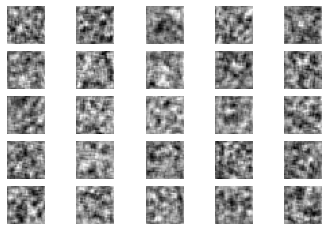

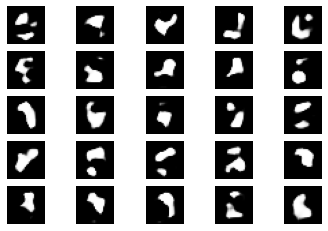

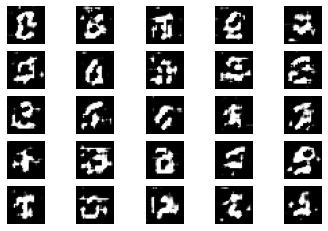

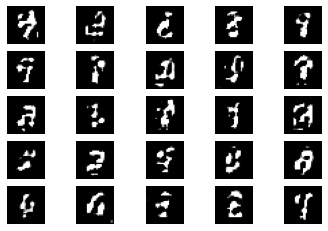

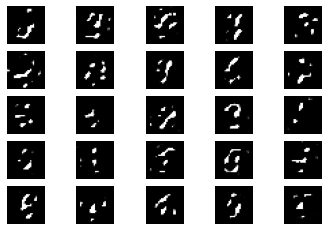

In [12]:
gan_train(500, 128, 100)